In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
type(time_idx[0])

str

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw[pd_raw['Country/Region']=='India'].iloc[:,10::].sum(axis=0)[-4:]

9/9/20     4465863
9/10/20    4562414
9/11/20    4659984
9/12/20    4754356
dtype: int64

In [8]:
country_list=['India',
              'US',
              'Spain',
              'Germany',
              'United Kingdom',
              'Korea, South',
              'Japan'
             ] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [10]:
df_plot.head()

,date,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan
0,1/22/20,0,1,0,0,0,1,2
1,1/23/20,0,1,0,0,0,1,2
2,1/24/20,0,2,0,0,0,2,2
3,1/25/20,0,2,0,0,0,2,2
4,1/26/20,0,5,0,0,0,3,4


<AxesSubplot:xlabel='date'>

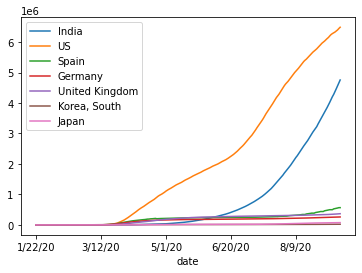

In [11]:
df_plot.set_index('date').plot()

In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)
print(type(time_str[0]))


<class 'str'>


In [13]:
df_plot['date']=time_idx

type(df_plot['date'][0])
df_plot.date[1:3]

1   2020-01-23
2   2020-01-24
Name: date, dtype: datetime64[ns]

In [14]:
df_plot.head()

,date,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan
0,2020-01-22,0,1,0,0,0,1,2
1,2020-01-23,0,1,0,0,0,1,2
2,2020-01-24,0,2,0,0,0,2,2
3,2020-01-25,0,2,0,0,0,2,2
4,2020-01-26,0,5,0,0,0,3,4


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

### Relational data model - defining a primary key


In [16]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,no,Albania,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,no,Algeria,0,0,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,no,Andorra,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,no,Angola,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [19]:
pd_relational_model=pd_data_base.set_index(['state','country'])
pd_relational_model.head()



1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
state country                                                             
no    Afghanistan        0        0        0        0        0        0   
      Albania            0        0        0        0        0        0   
      Algeria            0        0        0        0        0        0   
      Andorra            0        0        0        0        0        0   
      Angola             0        0        0        0        0        0   

                   1/28/20  1/29/20  1/30/20  1/31/20  ...  9/3/20  9/4/20  \
state country                                          ...                   
no    Afghanistan        0        0        0        0  ...   38288   38304   
      Albania            0        0        0        0  ...    9844    9967   
      Algeria            0        0        0        0  ...   45469   45773   
      Andorra            0        0        0        0  ...    1199    1215   
      Angola             0        0        0        0  ...    2805    2876   

                   9/5/20  9/6/20  9/7/20  9/8/20  9/9/20  9/10/20  9/11/20  \
state country                                                                 
no    Afghanistan   38324   38398   38494   38520   38544    38572    38606   
      Albania       10102   10255   10406   10553   10704    10860    11021   
      Algeria       46071   46364   46653   46938   47216    47488    47752   
      Andorra        1215    1215    1261    1261    1301     1301     1344   
      Angola         2935    2965    2981    3033    3092     3217     3279   

                   9/12/20  
state country               
no    Afghanistan    38641  
      Albania        11185  
      Algeria        48007  
      Andorra         1344  
      Angola          3335  

[5 rows x 235 columns]

In [20]:
pd_relational_model=pd_relational_model.T
pd_relational_model.head()

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   

state               no                                       \
country United Kingdom Uruguay Uzbekistan Venezuela Vietnam   
1/22/20              0       0          0         0       0   
1/23/20              0       0          0         0       2   
1/24/20              0       0          0         0       2   
1/25/20              0       0          0         0       2   
1/26/20              0       0          0         0       2   

state                                                            
country West Bank and Gaza Western Sahara Yemen Zambia Zimbabwe  
1/22/20                  0              0     0      0        0  
1/23/20                  0              0     0      0        0  
1/24/20                  0              0     0      0        0  
1/25/20                  0              0     0      0        0  
1/26/20                  0              0     0      0        0  

[5 rows x 266 columns]

In [21]:
pd_relational_model=pd_relational_model.stack(level=[0,1]).reset_index()


In [22]:
pd_relational_model = pd_relational_model.rename(columns={'level_0':'date',0:'confirmed'})
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [23]:
type(pd_relational_model['date'][0])

str

In [24]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed             int32
dtype: object

In [25]:
pd_relational_model.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,Anguilla,United Kingdom,0
2,2020-01-22,Anhui,China,1
3,2020-01-22,Aruba,Netherlands,0
4,2020-01-22,Australian Capital Territory,Australia,0


In [26]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [27]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


In [28]:
test_data=pd_JH_data[((pd_JH_data['country']=='India')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [29]:
test_data.tail()

,date,state,country,confirmed
61766,2020-09-10,no,India,4562414
62021,2020-09-11,no,Germany,259735
62033,2020-09-11,no,India,4659984
62286,2020-09-12,no,Germany,260817
62299,2020-09-12,no,India,4754356


In [30]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-09-12,no,260817
India,2020-09-12,no,4754356


In [31]:
test_data.groupby(['state', 'country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-09-12     260817
      India   2020-09-12    4754356

In [32]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    
    X = np.arange(-1,2).reshape(-1, 1)
    

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    print(slope,intercept)

    return intercept/slope


if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))

[2.] 4.0
the test slope is: [2.]


In [33]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [34]:
test_data[['state','country', 'confirmed']].tail()

,state,country,confirmed
61766,no,India,4562414
62021,no,Germany,259735
62033,no,India,4659984
62286,no,Germany,260817
62299,no,India,4754356


In [35]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

[3421.5] 25380.666666666668
[4056.5] 28971.666666666668
[4133.5] 33121.666666666664
[5476.] 38082.333333333336
[6774.] 44044.0
[6878.5] 50834.666666666664
[5612.] 56887.0
[4595.] 62225.0
[4856.5] 66929.33333333333
[5493.5] 72188.33333333333
[6493.] 78158.0
[6643.5] 84608.33333333333
[5649.] 90681.66666666667
[4482.] 95791.33333333333
[3641.] 99863.0
[3770.] 103720.0
[4961.] 108111.0
[5259.] 113046.66666666667
[4437.5]117882.66666666667
[3363.5] 121753.33333333333
[2841.5] 124977.66666666667
[2582.] 127611.33333333333
[1752.5] 129761.66666666667
[2340.5] 132061.33333333334
[3169.5] 134603.33333333334
[3322.] 137949.33333333334
[2822.] 140812.33333333334
[1893.5] 143307.66666666666
[1861.5] 145197.0
[1553.5] 146846.66666666666
[1791.5] 148668.0
[2419.] 150689.33333333334
[2175.5] 152925.33333333334
[1692.] 154880.33333333334
[1385.5] 156427.33333333334
[1122.5] 157680.33333333334
[1071.] 158813.33333333334
[1390.5] 160069.66666666666
[1548.5] 161486.66666666666
[1269.] 162875.0
[979.] 16

state  country       
no     Germany  15736            NaN
                16003            NaN
                16269       7.417994
                16535       7.142035
                16801       8.012983
                17066       6.954407
                17333       6.501919
                17598       7.390371
                17865      10.136671
                18131      13.541893
                18397      13.781393
                18663      13.140681
                18929      12.037271
                19195      12.735506
                19460      16.052694
                19727      21.372453
                19993      27.427355
                20259      27.511936
                20525      21.792179
                20791      21.495848
                21057      26.565108
                21323      36.198404
                21588      43.982990
                21855      49.423444
                22121      74.043747
                22386      56.424411
                

In [36]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

 350.0
[1.5] 351.0
[0.5] 352.3333333333333
[1.5] 353.3333333333333
[1.] 354.3333333333333
[0.] 355.0
[0.] 355.0
[0.] 355.0
[0.] 355.0
[0.] 355.0
[0.] 355.0
[0.] 355.0
[7.] 359.6666666666667
[7.] 364.3333333333333
[0.] 369.0
[0.] 369.0
[0.5] 369.3333333333333
[0.5] 369.6666666666667
[1.] 370.6666666666667
[1.5] 371.6666666666667
[0.5] 372.6666666666667
[4.] 375.6666666666667
[4.] 378.3333333333333
[0.5] 381.3333333333333
[0.5] 381.6666666666667
[0.5] 382.3333333333333
[1.] 383.0
[9.] 389.3333333333333
[12.] 397.6666666666667
[5.5] 407.0
[3.5] 411.6666666666667
[2.5] 414.6666666666667
[2.5] 417.3333333333333
[7.] 422.6666666666667
[13.] 432.3333333333333
[14.] 445.3333333333333
[31.5] 471.3333333333333
[49.5] 508.6666666666667
[40.5] 552.3333333333334
[31.5] 589.6666666666666
[31.] 621.0
[25.5] 648.3333333333334
[32.5] 680.3333333333334
[39.] 713.0
[36.] 752.0
[31.] 783.6666666666666
[26.] 814.0
[17.5] 833.3333333333334
[12.5] 851.3333333333334
[18.] 865.3333333333334
[22.5] 886.66666666

In [37]:
pd_DR_result = pd_DR_result.reset_index()

In [38]:
pd_DR_result

,state,country,level_2,confirmed
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,966,NaN
4,Alberta,Canada,1263,NaN
...,...,...,...,...
62505,no,Zimbabwe,61274,26.041137
62506,no,Zimbabwe,61510,112.544529
62507,no,Zimbabwe,61806,228.410256
62508,no,Zimbabwe,62042,298.146667


In [39]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.tail()

,state,country,index,confirmed_DR
62505,no,Zimbabwe,61274,26.041137
62506,no,Zimbabwe,61510,112.544529
62507,no,Zimbabwe,61806,228.410256
62508,no,Zimbabwe,62042,298.146667
62509,no,Zimbabwe,62509,272.000000


In [40]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,"Korea, South",1
2,2,2020-01-22,no,Kosovo,0
3,3,2020-01-22,no,Kuwait,0
4,4,2020-01-22,no,Kyrgyzstan,0


In [41]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR
62505,62505,2020-09-12,no,Barbados,180,inf
62506,62506,2020-09-12,no,Belarus,73975,384.288194
62507,62507,2020-09-12,no,Belgium,92478,95.840489
62508,62508,2020-09-12,no,Albania,11185,67.827692
62509,62509,2020-09-12,no,Zimbabwe,7508,272.000000


In [42]:
pd_result_larg[pd_result_larg['country']=='Germany'].head()

,index,date,state,country,confirmed,confirmed_DR
43,43,2020-01-22,no,Germany,0,NaN
308,308,2020-01-23,no,Germany,0,NaN
575,575,2020-01-24,no,Germany,0,NaN
841,841,2020-01-25,no,Germany,0,NaN
1107,1107,2020-01-26,no,Germany,0,NaN


## Filtering the data with groupby apply 

In [43]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [44]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [45]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8
2,2,2020-01-22,no,Kosovo,0,NaN,0.0
3,3,2020-01-22,no,Kuwait,0,NaN,0.0
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0


In [46]:
pd_result_larg[pd_result_larg['country']=='Germany'].head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
43,43,2020-01-22,no,Germany,0,NaN,0.0
308,308,2020-01-23,no,Germany,0,NaN,0.0
575,575,2020-01-24,no,Germany,0,NaN,0.0
841,841,2020-01-25,no,Germany,0,NaN,0.2
1107,1107,2020-01-26,no,Germany,0,NaN,1.0


233

In [47]:
import plotly.graph_objects as go
def quick_plot(x_in, df_input,y_scale='log',slider=False):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
    
        
        Returns:
        ----------
        
    """
    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))
    
    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()
      
    

## Filtered doubling rate

In [48]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})



282.5] 13379.999999999998
[288.3] 13664.666666666664
[292.2] 13955.33333333333
[293.9] 14247.599999999997
[302.5] 14547.733333333328
[318.9] 14857.799999999996
[326.9] 15179.933333333329
[330.2] 15508.466666666665
[331.9] 15839.266666666663
[347.5] 16181.533333333331
[358.7] 16531.333333333332
[360.8] 16892.866666666665
[361.5] 17251.999999999996
[341.1] 17601.8
[312.8] 17928.93333333333
[310.3] 18244.6
[329.6] 18564.066666666666
[353.1] 18906.6
[404.3] 19288.733333333334
[465.] 19721.53333333333
[490.4] 20195.199999999993
[498.1] 20690.53333333333
[510.] 21194.199999999993
[517.8] 21707.799999999992
[522.8] 22227.93333333333
[542.7] 22763.333333333325
[574.1] 23320.999999999996
[578.4] 23893.466666666664
[569.2] 24468.8
[575.] 25041.866666666658
[579.6] 25617.999999999996
[566.9] 26189.53333333333
[586.6] 26773.399999999994
[621.8] 27373.066666666662
[625.6] 27996.066666666662
[633.85] 28627.233333333326
[642.3] 29263.899999999994
[0.] 0.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[0.] 0.0


In [49]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
62505,62505,2020-09-12,no,Barbados,180,inf,180.0,-1.266637e+16
62506,62506,2020-09-12,no,Belarus,73975,384.288194,73975.2,3.850919e+02
62507,62507,2020-09-12,no,Belgium,92478,95.840489,92387.0,1.074354e+02
62508,62508,2020-09-12,no,Albania,11185,67.827692,11180.8,6.971980e+01
62509,62509,2020-09-12,no,Zimbabwe,7508,272.000000,7509.4,2.579448e+02


In [50]:
pd_result_larg.date

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
62505   2020-09-12
62506   2020-09-12
62507   2020-09-12
62508   2020-09-12
62509   2020-09-12
Name: date, Length: 62510, dtype: datetime64[ns]

In [51]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN) 

In [52]:
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8,NaN
2,2,2020-01-22,no,Kosovo,0,NaN,0.0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN,0.0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN


In [53]:
quick_plot(pd_result_larg[pd_result_larg['country']=='Germany'].date,
           pd_result_larg[pd_result_larg['country']=='Germany'].iloc[:,[4,5,6,7]],
           y_scale='log',
           slider=True)

In [54]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)

In [55]:
pd_result_larg

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8,NaN
2,2,2020-01-22,no,Kosovo,0,NaN,0.0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN,0.0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...
62505,62505,2020-09-12,no,Barbados,180,inf,180.0,-1.266637e+16
62506,62506,2020-09-12,no,Belarus,73975,384.288194,73975.2,3.850919e+02
62507,62507,2020-09-12,no,Belgium,92478,95.840489,92387.0,1.074354e+02
62508,62508,2020-09-12,no,Albania,11185,67.827692,11180.8,6.971980e+01


In [56]:
pd_JH_data_deaths=pd.read_csv('../data/processed/COVID_relational_deaths.csv',sep=';',parse_dates=[0])
pd_JH_data_deaths=pd_JH_data_deaths.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data_deaths[pd_JH_data_deaths['country']=='India'].tail()

,date,state,country,deaths
61234,2020-09-08,no,India,73890.0
61501,2020-09-09,no,India,75062.0
61766,2020-09-10,no,India,76271.0
62033,2020-09-11,no,India,77472.0
62299,2020-09-12,no,India,78586.0


In [57]:
pd_DR_result_death = pd_JH_data_deaths[['state','country','deaths']].reset_index()

In [58]:
pd_DR_result_death.head()

,index,state,country,deaths
0,0,Alberta,Canada,0.0
1,1,no,"Korea, South",0.0
2,2,no,Kosovo,0.0
3,3,no,Kuwait,0.0
4,4,no,Kyrgyzstan,0.0


In [59]:
pd_result_larg=pd.merge(pd_result_larg,pd_DR_result_death[['index','deaths']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR,deaths
62505,62505,2020-09-12,no,Barbados,180,inf,180.0,-1.266637e+16,7.0
62506,62506,2020-09-12,no,Belarus,73975,384.288194,73975.2,3.850919e+02,744.0
62507,62507,2020-09-12,no,Belgium,92478,95.840489,92387.0,1.074354e+02,9923.0
62508,62508,2020-09-12,no,Albania,11185,67.827692,11180.8,6.971980e+01,330.0
62509,62509,2020-09-12,no,Zimbabwe,7508,272.000000,7509.4,2.579448e+02,224.0


In [60]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)

In [61]:
pd_JH_data_recov=pd.read_csv('../data/processed/COVID_relational_recovered.csv',sep=';',parse_dates=[0])
pd_JH_data_recov=pd_JH_data_recov.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data_recov[pd_JH_data_recov['country']=='India'].tail()

,date,state,country,recovered
58236,2020-09-08,no,India,3398844.0
58489,2020-09-09,no,India,3471783.0
58742,2020-09-10,no,India,3542663.0
58995,2020-09-11,no,India,3624196.0
59249,2020-09-12,no,India,3702595.0


In [62]:
pd_DR_result_recov = pd_JH_data_recov[['state','date','country','recovered']].reset_index()

In [63]:
pd_DR_result_recov.tail(1000
)

,index,state,date,country,recovered
58455,58455,no,2020-09-09,Maldives,6288.0
58456,58456,no,2020-09-09,New Zealand,1648.0
58457,58457,no,2020-09-09,Malta,1760.0
58458,58458,no,2020-09-09,Mauritania,6701.0
58459,58459,no,2020-09-09,Mauritius,335.0
...,...,...,...,...,...
59450,59450,no,2020-09-12,Brazil,3723206.0
59451,59451,no,2020-09-12,Brunei,139.0
59452,59452,no,2020-09-12,Bulgaria,12758.0
59453,59453,no,2020-09-12,Bahrain,53192.0


In [64]:
pd_DR_result_recov.to_csv('../data/processed/COVID_final_recov_set.csv',sep=';',index=False)

In [65]:
pd_result_larg.columns

Index(['index', 'date', 'state', 'country', 'confirmed', 'confirmed_DR',
       'confirmed_filtered', 'confirmed_filtered_DR', 'deaths'],
      dtype='object')

In [84]:
pd_daily = pd_result_larg[['state','country','confirmed','date','deaths']].groupby(['country','date']).agg(np.sum).reset_index()
pd_daily_recov = pd.read_csv('../data/processed/COVID_final_recov_set.csv',sep=';',parse_dates=[0])
pd_daily_recov = pd_daily_recov[['state','country','recovered','date']].groupby(['country','date']).agg(np.sum).reset_index()


In [85]:
list(pd_daily[pd_daily['country']=='India']['confirmed'])[1:10]

[0, 0, 0, 0, 0, 0, 0, 1, 1]

In [86]:
a = [1,2,3,4]
a.pop(0)
a

[2, 3, 4]

In [87]:
def get_daily_list(total_list):
    daily_list=[]
    daily_list.append(total_list.pop(0))
    for each in range(len(total_list)):
        if each == 0:
            daily_list.append(total_list[each] - total_list[0])
        else:
            daily_list.append(total_list[each] - total_list[each-1])
    
    return daily_list



In [88]:
pd_daily[pd_daily['country']=='India'].head(15)

,country,date,confirmed,deaths
18565,India,2020-01-22,0,0.0
18566,India,2020-01-23,0,0.0
18567,India,2020-01-24,0,0.0
18568,India,2020-01-25,0,0.0
18569,India,2020-01-26,0,0.0
18570,India,2020-01-27,0,0.0
18571,India,2020-01-28,0,0.0
18572,India,2020-01-29,0,0.0
18573,India,2020-01-30,1,0.0
18574,India,2020-01-31,1,0.0


In [89]:
aa= pd_daily.copy()
aa.tail()

,country,date,confirmed,deaths
44175,Zimbabwe,2020-09-08,7388,218.0
44176,Zimbabwe,2020-09-09,7429,222.0
44177,Zimbabwe,2020-09-10,7453,222.0
44178,Zimbabwe,2020-09-11,7479,224.0
44179,Zimbabwe,2020-09-12,7508,224.0


In [95]:
def calc_daily_values_all_countries(all_countries):
    df_daily_all= pd.DataFrame()
    for each_country in all_countries:
        daily_list = get_daily_list(list(pd_daily[pd_daily['country']==each_country]['confirmed']))
        df_daily = pd.DataFrame(np.array(daily_list))

        
        df_daily_death = np.array(get_daily_list(list(pd_daily[pd_daily['country']==each_country]['deaths'])))
        df_daily_recov = np.array(get_daily_list(list(pd_daily_recov[pd_daily['country']==each_country]['recovered'])))


        df_daily = df_daily.rename(columns={0:'daily_confirmed'})
        df_daily['daily_deaths'] = df_daily_death
        df_daily['daily_recovered'] = df_daily_recov
        df_daily['date'] = np.array(pd_daily[pd_daily['country']==each_country]['date'])
        df_daily['country'] = np.array(pd_daily[pd_daily['country']==each_country]['country'])
        df_daily_all = pd.concat([df_daily_all,df_daily])

    return df_daily_all
    


In [96]:
pd_daily['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [97]:
df_daily_all= calc_daily_values_all_countries(pd_daily['country'].unique())
df_daily_all = df_daily_all.reset_index()

In [98]:

df_daily_all.daily_deaths = df_daily_all.daily_deaths.mask(df_daily_all.daily_deaths.lt(0), 0)


In [99]:
df_daily_all[df_daily_all['country']=='India'].head(100)    

,index,daily_confirmed,daily_deaths,daily_recovered,date,country
18565,0,0,0.0,0.0,2020-01-22,India
18566,1,0,0.0,0.0,2020-01-23,India
18567,2,0,0.0,0.0,2020-01-24,India
18568,3,0,0.0,0.0,2020-01-25,India
18569,4,0,0.0,0.0,2020-01-26,India
18570,5,0,0.0,0.0,2020-01-27,India
18571,6,0,0.0,0.0,2020-01-28,India
18572,7,0,0.0,0.0,2020-01-29,India
18573,8,1,0.0,0.0,2020-01-30,India
18574,9,0,0.0,0.0,2020-01-31,India


In [135]:
df_daily_all.to_csv('../data/processed/COVID_final_daily_set.csv',sep=';',index=False)

In [136]:
test = pd_result_larg.copy()

In [137]:
df_plot=test[test['country']=="United Kingdom"]
#df_plot=df_plot[['state','country','confirmed','confirmed_filtered','confirmed_DR','confirmed_filtered_DR','date']].groupby(['country','date']).agg(np.sum).reset_index()
test

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR,deaths
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN,0.0
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8,NaN,0.0
2,2,2020-01-22,no,Kosovo,0,NaN,0.0,NaN,0.0
3,3,2020-01-22,no,Kuwait,0,NaN,0.0,NaN,0.0
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
62505,62505,2020-09-12,no,Barbados,180,inf,180.0,-1.266637e+16,7.0
62506,62506,2020-09-12,no,Belarus,73975,384.288194,73975.2,3.850919e+02,744.0
62507,62507,2020-09-12,no,Belgium,92478,95.840489,92387.0,1.074354e+02,9923.0
62508,62508,2020-09-12,no,Albania,11185,67.827692,11180.8,6.971980e+01,330.0


In [138]:
df_plot

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR,deaths
87,87,2020-01-22,no,United Kingdom,0,NaN,0.0,NaN,0.0
136,136,2020-01-22,Isle of Man,United Kingdom,0,NaN,0.0,NaN,0.0
145,145,2020-01-22,Montserrat,United Kingdom,0,NaN,0.0,NaN,0.0
173,173,2020-01-22,Bermuda,United Kingdom,0,NaN,0.0,NaN,0.0
176,176,2020-01-22,British Virgin Islands,United Kingdom,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
62422,62422,2020-09-12,Cayman Islands,United Kingdom,208,inf,208.6,297.000000,1.0
62423,62423,2020-09-12,Channel Islands,United Kingdom,633,632.333333,633.4,632.400000,48.0
62427,62427,2020-09-12,Falkland Islands (Malvinas),United Kingdom,13,inf,13.0,NaN,0.0
62433,62433,2020-09-12,Gibraltar,United Kingdom,327,162.166667,326.0,216.333333,0.0


In [139]:
df_plot1=test[['state','country','confirmed','confirmed_filtered','confirmed_DR','confirmed_filtered_DR','date','deaths']].groupby(['country','date']).agg(np.sum).reset_index()


In [154]:
df_plot1[df_plot1['country']=="France"][-2:-1]

,country,date,confirmed,confirmed_filtered,confirmed_DR,confirmed_filtered_DR,deaths
18798,India,2020-09-11,4659984,4658806.7,47.009377,47.769387,77472.0


In [149]:
a ='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
abc=pd.read_csv(a)

In [150]:
abc

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,95,95,95,95,95,95,95,95,95,95
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,451198,461882,471806,478792,488007,500034,512293,524198,535705,546481
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,44271,44461,44649,44783,44845,44953,45152,45326,45503,45675
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,4099,4104,4114,4118,4126,4135,4142,4152,4157,4166
